This example is based on the multiple regression example in Table 14.6 from Ken Black (2010). *Business Statistics for Contemporary Decision Making*, 6th Edition, John Wiley and Sons. p. 567.

Import dependent libraries: pandas (`pd`) for data manipulation, sklearn's `linear_model` for statistics, and matplotlib's pyplot (`plt`) for visualization.

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

First, make sure that the data file `data-oil-production.csv` is accessible to your Python environment. If you are using your local machine, you can put it in the same directory as this Jupyter notebook. If you are using a cloud service like Google Colab, make sure to upload the file to the remote machine (expand folder icon on left side and click upload button).

Next, read the data file using pandas.

In [2]:
df = pd.read_csv('data-oil-production.csv')
display(df)

,CrudeProduction,EnergyConsumption,NuclearElectricity,CoalProduction,GasProduction,AutoMPG
0,55.7,74.3,83.5,598.6,21.7,13.4
1,55.7,72.5,114.0,610.0,20.7,13.6
2,52.8,70.5,172.5,654.6,19.2,14.0
3,57.3,74.4,191.1,684.9,19.1,13.8
4,59.7,76.3,250.9,697.2,19.2,14.1
5,60.2,78.1,276.4,670.2,19.1,14.3
6,62.7,78.9,255.2,781.1,19.7,14.6
7,59.6,76.0,251.1,829.7,19.4,16.0
8,56.1,74.0,272.7,823.8,19.2,16.5
9,53.5,70.8,282.8,838.1,17.8,16.9


Separate the dependent variable (`y`) from the independent variables (`X`).

In [3]:
y = df.CrudeProduction
X = df[['EnergyConsumption', 'NuclearElectricity', 'CoalProduction', 'GasProduction', 'AutoMPG']]

Build and fit a linear model using the independent and dependent variables.

intercept = 2.708473950357117
coef = [ 0.83567046 -0.00654432  0.00982508 -0.14321095 -0.73414356]
R^2 = 0.921


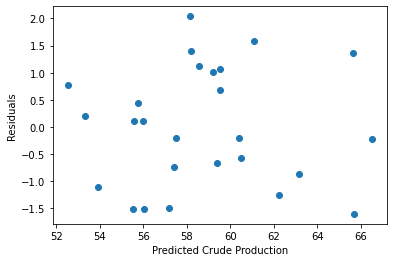

In [4]:
model = linear_model.LinearRegression().fit(X, y)
print('intercept = {:}'.format(model.intercept_))
print('coef = {:}'.format(model.coef_))
print('R^2 = {:.3f}'.format(model.score(X,y)))

y_hat = model.predict(X)
plt.figure()
plt.scatter(y_hat, y-y_hat)
plt.xlabel('Predicted Crude Production')
plt.ylabel('Residuals')
plt.show()

A LASSO procedure can also be used to select features.

coef = [ 0.71961883 -0.00800783  0.00244795  0.         -0.        ]
intercept = 3.258178633036067
R^2 = 0.900


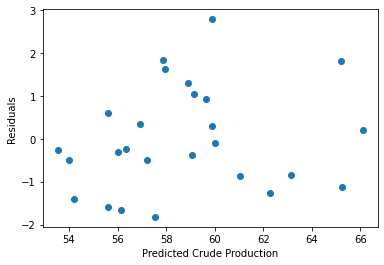

In [5]:
model = linear_model.Lasso(alpha=1).fit(X, y)
print('coef = {:}'.format(model.coef_))
print('intercept = {:}'.format(model.intercept_))
print('R^2 = {:.3f}'.format(model.score(X,y)))

y_hat = model.predict(X)
plt.figure()
plt.scatter(y_hat, y-y_hat)
plt.xlabel('Predicted Crude Production')
plt.ylabel('Residuals')
plt.show()